# CMIP6 Historical model runs
This script opens up all the CMIP6 historical model run files with data on precipitation pr and surface temperature tas and loops over the files.


In [15]:
import xarray as xr, matplotlib.pyplot as plt
#import sys 
#sys.path.append('') # use this if the function file is in a different directory to the notebook
from importlib import reload # need to use this if I edit a function file
import anomaly_function as func # imports the function
import os
import numpy as np
import pandas as pd
import cartopy.crs as ccrs # to add in continents and change map projections 
from matplotlib.colors import LinearSegmentedColormap # to change colour bar????

In [5]:
# use this to reload the function file if I make any edits to it
func = reload(func) 

In [6]:
!ls /g/data/lp01/CMIP6/CMIP

AS-RCEC  CCCma	       CSIRO-ARCCSS	    INM    MRI	      NOAA-GFDL
AWI	 CCCR-IITM     E3SM-Project	    IPSL   NASA-GISS  NUIST
BCC	 CMCC	       EC-Earth-Consortium  MIROC  NCAR       SNU
CAMS	 CNRM-CERFACS  FIO-QLNM		    MOHC   NCC	      THU
CAS	 CSIRO	       HAMMOZ-Consortium    MPI-M  NIMS-KMA   UA


In [7]:
# store each section of the directory as a string
institution_dir = '/g/data/lp01/CMIP6/CMIP/'
variable_dir = '/historical/r1i1p1f1/Amon/tas/gr1.5/'
print(institution_dir, variable_dir)

/g/data/lp01/CMIP6/CMIP/ /historical/r1i1p1f1/Amon/tas/gr1.5/


In [8]:
multi_model = func.read_models(institution_dir, variable_dir)

45 model paths found and loaded into the dictionary "models"
MPI-ESM-1-2-HAM /g/data/lp01/CMIP6/CMIP/HAMMOZ-Consortium/MPI-ESM-1-2-HAM/historical/r1i1p1f1/Amon/tas/gr1.5/v20190627/*.nc
NESM3 /g/data/lp01/CMIP6/CMIP/NUIST/NESM3/historical/r1i1p1f1/Amon/tas/gr1.5/v20190630/*.nc
Path for MCM-UA-1-0 does not exist
ACCESS-CM2 /g/data/lp01/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Amon/tas/gr1.5/v20190919/*.nc
Model MPI-ESM1-2-HR has different time so is now removed
MPI-ESM1-2-LR /g/data/lp01/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/historical/r1i1p1f1/Amon/tas/gr1.5/v20190710/*.nc
IPSL-CM6A-LR /g/data/lp01/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/Amon/tas/gr1.5/v20180803/*.nc
CAS-ESM2-0 /g/data/lp01/CMIP6/CMIP/CAS/CAS-ESM2-0/historical/r1i1p1f1/Amon/tas/gr1.5/v20200302/*.nc
FGOALS-f3-L /g/data/lp01/CMIP6/CMIP/CAS/FGOALS-f3-L/historical/r1i1p1f1/Amon/tas/gr1.5/v20190927/*.nc
FGOALS-g3 /g/data/lp01/CMIP6/CMIP/CAS/FGOALS-g3/historical/r1i1p1f1/Amon/tas/gr1.5/v20190818/*.nc
BCC-ESM1 

Right now I have all the models stored in one array so from hereafter I can calculate anomalies etc.  

# need to figure out how to input in the landmask here

In [17]:
# area weighting 
multi_modelw = multi_model*np.cos(multi_model.lat*(np.pi/180))

In [18]:
# import land fraction data
landfrac_ds = xr.open_dataset('/home/563/kb6999/Models/landfraction_file_grid1.5.nc')
landmask = landfrac_ds.mean(dim='time')

In [23]:
# this is where I want to use the land mask and select out the continents
multi_model_land = multi_modelw.where(landmask.data==1, drop=True)
multi_model_land.tas

,Array,Chunk
Bytes,17.15 GB,418.18 MB
Shape,"(41, 1980, 110, 240)","(1, 1980, 110, 240)"
Count,289 Tasks,41 Chunks
Type,float64,numpy.ndarray


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Text(-0.05, 0, 'Latitude')

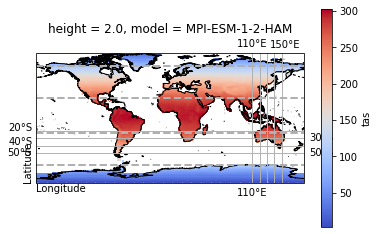

In [25]:
# check that land mask is working
ax = plt.axes(projection=ccrs.PlateCarree()) # plot results with coastlines

multi_model_land.tas.mean(dim='time').sel(model='MPI-ESM-1-2-HAM').plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')
ax.coastlines(resolution='50m')
#ax.set_extent([110,160,-50,-5]) # sets axis bounds to show only australia region lon, lon, lat, lat
# add on grid lines for longitude and latitude at specified range and spacing
ax.gridlines(xlocs=range(110,160,10), ylocs=range(-50,-10,10),draw_labels=False) 
ax.gridlines(xlocs=range(110,160,10), ylocs=range(-50,-10,10),draw_labels=True)
# add in different grid lines for tropics
tropics = ax.gridlines(ylocs=[-66.5,-23.43691,23.43691,66.5],draw_labels=False,linewidth=2,linestyle='--', edgecolor='dimgrey')
tropics.xlines=False

#labels for latitude and longitude
ax.text(0,-0.07,'Longitude', transform=ax.transAxes, ha='left')
ax.text(-0.05,0,'Latitude', transform=ax.transAxes, rotation='vertical', va='bottom')

In [26]:
# here I select the Australia region with a lon,lat box
multi_model_aus = multi_model_land.sel(lat=slice(-50,-10), lon=slice(110,160)) 

In [27]:
# calculate an anomaly for each model
monthly_anom=[]
seasonal_anom=[]

for m in multi_model_aus.model:
    monthly_anom.append(func.monthly_anomaly(multi_model_aus.sel(model=m).tas, '18500101', '19001231'))
    seasonal_anom.append(func.seasonal_anomaly(multi_model_aus.sel(model=m), '18500101', '19001231'))


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-

In [28]:
# Combine the individual data sets into a single xarray dataset.
multi_monthly_anom = xr.concat(monthly_anom, dim='model')
multi_seasonal_anom = xr.concat(seasonal_anom, dim='model')

In [29]:
# take the mean in longitutde and latitude for each model
mean_mon = multi_monthly_anom.mean(dim=('lat','lon'))
mean_seasonal = multi_seasonal_anom.mean(dim=('lat','lon'))

In [30]:
# calculate the multi model mean
mmm_mon = mean_mon.mean(dim='model')
mmm_seasonal = mean_seasonal.mean(dim='model')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1,

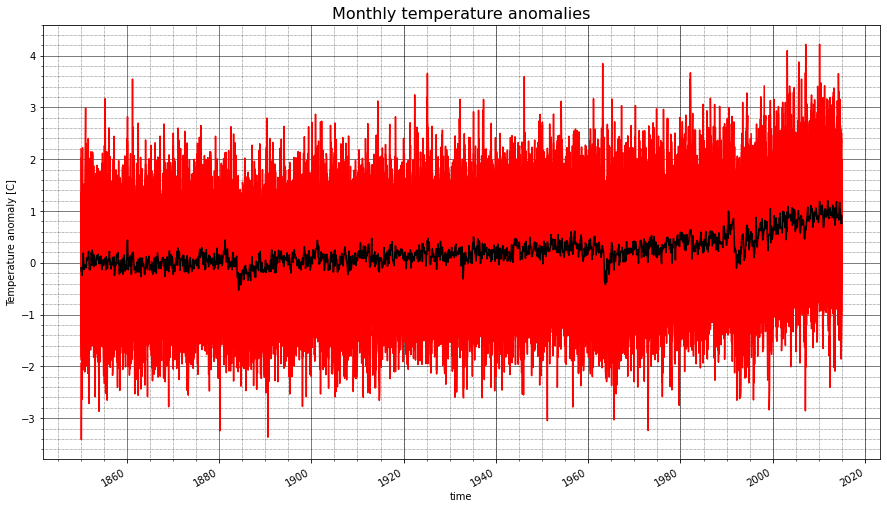

In [31]:
fig, ax = plt.subplots() # make a figure

# loop over all the models and plot the monthly anomalies on one graph
for m in mean_mon.model:
    mean_mon.sel(model=m).plot(color = 'red', ax=ax) #plot the anomalies

# plot the multi_model mean
mmm_mon.plot(color = 'k', ax=ax) 
plt.title('Monthly temperature anomalies', fontsize=16)
plt.ylabel('Temperature anomaly [C]') # this overrides the label which comes on automatically using the xarray title

ax.grid(which='major', linestyle='-', linewidth='0.5', color='black') # customise major grid
ax.minorticks_on() # need this line in order to get the minor grid lines 
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

fig.set_figheight(8) # these two parameters change the figure height and width 
fig.set_figwidth(15)

In [ ]:
mean_mon.sel(time=slice('18780101','18931231'))

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1,

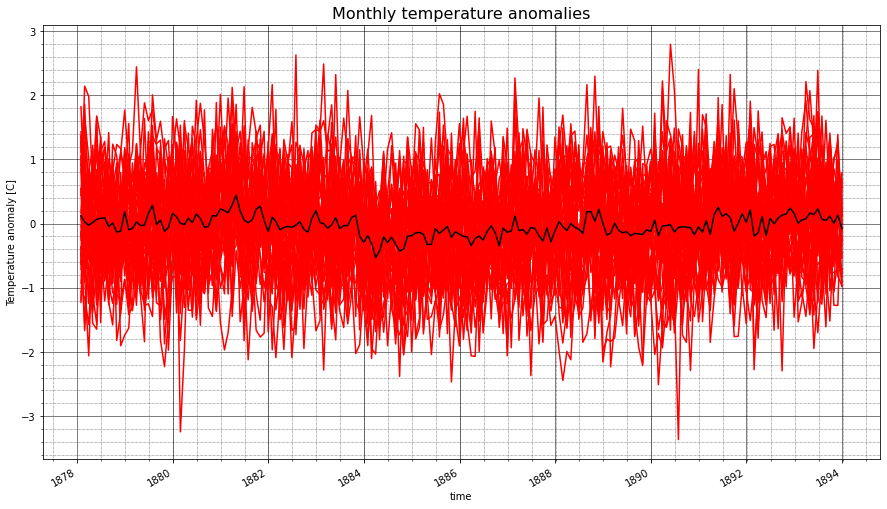

In [32]:
fig, ax = plt.subplots() # make a figure

# loop over all the models and plot the monthly anomalies on one graph
for m in mean_mon.model:
    mean_mon.sel(model=m).sel(time=slice('18780101','18931231')).plot(color = 'red', ax=ax) #plot the anomalies

# plot the multi_model mean
mmm_mon.sel(time=slice('18780101','18931231')).plot(color = 'k', ax=ax) 
plt.title('Monthly temperature anomalies', fontsize=16)
plt.ylabel('Temperature anomaly [C]') # this overrides the label which comes on automatically using the xarray title

ax.grid(which='major', linestyle='-', linewidth='0.5', color='black') # customise major grid
ax.minorticks_on() # need this line in order to get the minor grid lines 
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

fig.set_figheight(8) # these two parameters change the figure height and width 
fig.set_figwidth(15)

In [33]:
# select the anomaly for each season

anom_djf = mean_seasonal.sel(season = 'DJF')
anom_mam = mean_seasonal.sel(season = 'MAM')
anom_jja = mean_seasonal.sel(season = 'JJA')
anom_son = mean_seasonal.sel(season = 'SON')

In [34]:
mmm_djf = mmm_seasonal.sel(season = 'DJF')
mmm_mam = mmm_seasonal.sel(season = 'MAM')
mmm_jja = mmm_seasonal.sel(season = 'JJA')
mmm_son = mmm_seasonal.sel(season = 'SON')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


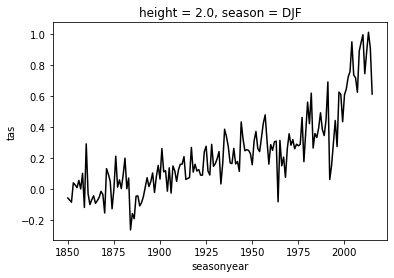

In [35]:
f, ax = plt.subplots()
mmm_djf.tas.plot(color = 'k', ax=ax) 

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1,

Text(0.5, 0.98, 'Seasonal temperature anomalies')

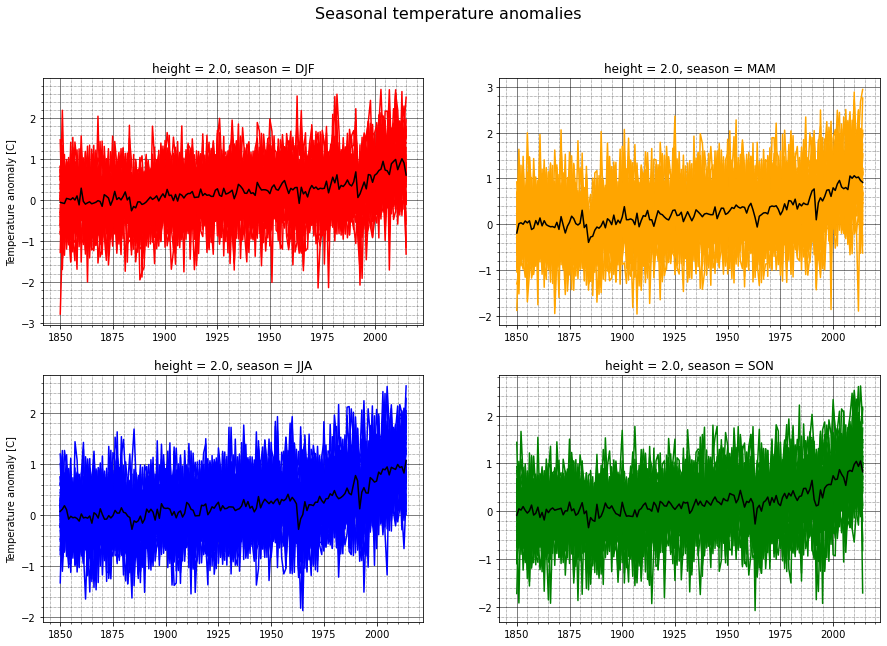

In [37]:
# seasonal temperature anomalies from 1850-2014 using a climatology from 1850-1900

f = plt.figure(figsize=(15,10))
ax = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)

# loop over all the models and plot the monthly anomalies on one graph
for m in mean_mon.model:
    anom_djf.sel(model=m).tas.plot(ax=ax, color ='red') # plot the anomalies
    anom_mam.sel(model=m).tas.plot(ax=ax2, color='orange')
    anom_jja.sel(model=m).tas.plot(ax=ax3, color='blue')
    anom_son.sel(model=m).tas.plot(ax=ax4, color='green')

    
# plot the multimodel mean
mmm_djf.tas.plot(color = 'k', ax=ax) 
mmm_mam.tas.plot(color = 'k', ax=ax2) 
mmm_jja.tas.plot(color = 'k', ax=ax3) 
mmm_son.tas.plot(color = 'k', ax=ax4) 
    
#subplot 1 DJF
# add gridlines
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black') # customise major grid
ax.set_axisbelow(True) # Don't allow the axis to be on top of your data, don't necessarily need this line
ax.minorticks_on() # need this line in order to get the minor grid lines 
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# change axis labels
ax.set(xlabel=None)
ax.set(ylabel='Temperature anomaly [C]')
# set axis limits
#ax.set_ylim(ymin = -0.7, ymax = 1.7)

# subplot 2 MAM
# add gridlines
ax2.grid(which='major', linestyle='-', linewidth='0.5', color='black') # customise major grid
ax2.set_axisbelow(True) # Don't allow the axis to be on top of your data, don't necessarily need this line
ax2.minorticks_on() # need this line in order to get the minor grid lines 
ax2.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# change axis labels
ax2.set(xlabel=None)
ax2.set(ylabel=None)
# set axis limits
#ax2.set_ylim(ymin = -0.7, ymax = 1.7)

# subplot 3 JJA
# add gridlines
ax3.grid(which='major', linestyle='-', linewidth='0.5', color='black') # customise major grid
ax3.set_axisbelow(True) # Don't allow the axis to be on top of your data, don't necessarily need this line
ax3.minorticks_on() # need this line in order to get the minor grid lines 
ax3.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# change axis labels
ax3.set(xlabel=None)
ax3.set(ylabel='Temperature anomaly [C]')
# set axis limits
#ax3.set_ylim(ymin = -0.7, ymax = 1.7)

# subplot 4 SON
# add gridlines
ax4.grid(which='major', linestyle='-', linewidth='0.5', color='black') # customise major grid
ax4.set_axisbelow(True) # Don't allow the axis to be on top of your data, don't necessarily need this line
ax4.minorticks_on() # need this line in order to get the minor grid lines 
ax4.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# change axis labels
ax4.set(ylabel=None)
ax4.set(xlabel=None)
# set axis limits
#ax4.set_ylim(ymin = -0.7, ymax = 1.7)

f.suptitle('Seasonal temperature anomalies', fontsize=16)
